# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. Negative Correlation between each city's latitude and the temp_max in the notherhemisphere. as we go away from the equator max temp will decrease compared to the cities closer to the equator.
2. Weak, postive correlation between cloudness and a city's latitude for both the nothern and sourthern hemispheres. It is tough to examine the relationship based on correlation.
3. nothern hemisphere showed weak postive correlation between a city's latitude and a wind speed (mph). negative correlation towards the sourthern hemisphere but stronger compared to the nothern hemisphere. relating to the seasons for each being the opposite and showing weak correlation twoards the latitude on wind speed.

In [19]:
# Import your Dependencies and setup  
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
import os
import matplotlib.pyplot as plt

# Open and Read CSV
f_path=os.path.join("..","output_data","cities.csv")
cities_pd= pd.read_csv(f_path)
cities_pd.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [20]:
# Lists:
Location=[]
cities=[]
Lats=np.random.uniform((-90),(90),size=1500)
Lngs=np.random.uniform((-180),(180),size=1500)
Location=zip(Lats,Lngs)


for L in Location:
    city=citipy.nearest_city(L[0],L[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
units="imperial"
url="http://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}appid={weather_api_key}&units={units}&q="
country=[]
date=[]
newcities=[]
Latitude=[]
Longitude=[]
Temperature=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]
citycount=len(cities)
record=1
# Loop through the cities data excluding undefined cities:
print("Beginning Data Gathering")
print("---------")
for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        newcities.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Latitude.append(response["coord"]["lat"])
        Longitude.append(response["coord"]["lon"])
        Temperature.append(response["main"]["temp_max"])
        Windspeed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')

Beginning Data Gathering
---------
Processing Record 1 | codrington
Processing Record 2 | bluff
Processing Record 3 | kodiak
Processing Record 4 | kapaa
Processing Record 5 | ushuaia
Processing Record 6 | rovaniemi
Processing Record 7 | rikitea
Processing Record 8 | hernani
Processing Record 9 | hobart
Processing Record 10 | san vicente
Processing Record 11 | pemberton
Processing Record 12 | houma
Processing Record 13 | tiksi
Processing Record 14 | esperance
Processing Record 15 | airai
Processing Record 16 | ketchikan
Processing Record 17 | tasiilaq
Processing Record 18 | tomatlan
Processing Record 19 | lebu
Processing Record 20 | shieli
Processing Record 21 | fortuna
Processing Record 22 | kimbe
Processing Record 23 | nikolskoye
Processing Record 24 | georgetown
Processing Record 25 | hithadhoo
Processing Record 26 | manacapuru
City not found. Skipping...
Processing Record 27 | kahului
Processing Record 28 | ponta do sol
Processing Record 29 | port alfred
Processing Record 30 | longy

Processing Record 231 | mattru
City not found. Skipping...
Processing Record 232 | arraial do cabo
Processing Record 233 | mitu
Processing Record 234 | mahibadhoo
Processing Record 235 | hirara
Processing Record 236 | ati
Processing Record 237 | port elizabeth
Processing Record 238 | bombay
City not found. Skipping...
Processing Record 239 | mecca
Processing Record 240 | masvingo
Processing Record 241 | ranong
Processing Record 242 | piranshahr
Processing Record 243 | sudak
Processing Record 244 | okhotsk
Processing Record 245 | gornyak
Processing Record 246 | ribeira grande
Processing Record 247 | shubarkuduk
Processing Record 248 | zhanaozen
Processing Record 249 | hede
Processing Record 250 | monrovia
Processing Record 251 | tucurui
Processing Record 252 | malmo
Processing Record 253 | inuvik
Processing Record 254 | meiganga
Processing Record 255 | mbengwi
City not found. Skipping...
Processing Record 256 | mocuba
City not found. Skipping...
Processing Record 257 | talara
Processing

Processing Record 464 | mandalgovi
Processing Record 465 | jutai
Processing Record 466 | puerto baquerizo moreno
Processing Record 467 | przhevalskoye
Processing Record 468 | angoram
Processing Record 469 | luanda
Processing Record 470 | port hedland
Processing Record 471 | sahuaripa
Processing Record 472 | brae
Processing Record 473 | rio gallegos
City not found. Skipping...
Processing Record 474 | aykhal
Processing Record 475 | mildura
Processing Record 476 | the valley
Processing Record 477 | yerbogachen
Processing Record 478 | jalu
Processing Record 479 | winnemucca
Processing Record 480 | moorhead
Processing Record 481 | quatre cocos
Processing Record 482 | biak
Processing Record 483 | shaoyang
Processing Record 484 | covington
Processing Record 485 | montivilliers
Processing Record 486 | lavrentiya
Processing Record 487 | luderitz
Processing Record 488 | akkermanovka
Processing Record 489 | aksu
Processing Record 490 | angoche
Processing Record 491 | homer
Processing Record 492 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
weather_df=pd.DataFrame({"country":country,"date":date,"newcities":newcities,"longitude":Longitude,"Latitude":Latitude,
                        "Temperature":Temperature,"Humidity":Humidity,"Cloudiness":Cloudiness,"Windspeed":Windspeed})

weather_df

,country,date,newcities,longitude,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,AU,1600627199,Codrington,141.97,-38.27,48.65,89,0,12.50
1,NZ,1600627199,Bluff,168.33,-46.60,35.01,95,8,1.01
2,US,1600627199,Saint Paul Harbor,-152.41,57.79,44.60,87,1,1.48
3,US,1600627200,Kapaa,-159.32,22.08,77.00,94,90,6.93
4,AR,1600627200,Ushuaia,-68.30,-54.80,46.40,49,75,5.82
...,...,...,...,...,...,...,...,...,...
587,CN,1600627332,Xingtai,114.49,37.06,65.75,67,0,4.50
588,CN,1600627332,Shache,77.24,38.42,54.25,47,0,5.86
589,LY,1600627332,Al Bardīyah,25.09,31.76,75.13,83,24,19.98
590,NZ,1600627332,Waipawa,175.52,-41.41,53.60,81,1,17.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
weather_df.describe()

,date,longitude,Latitude,Temperature,Humidity,Cloudiness,windspeed
count,5.920000e+02,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,1.600627e+09,16.404882,19.123074,66.439848,69.528716,45.675676,7.916841
std,6.656444e+01,89.972002,32.739718,16.205524,21.609342,39.299529,5.548178
min,1.600627e+09,-179.170000,-54.800000,23.250000,11.000000,0.000000,0.200000
25%,1.600627e+09,-65.875000,-6.220000,54.660000,58.750000,1.000000,3.760000
50%,1.600627e+09,19.095000,19.810000,69.010000,74.000000,40.000000,6.890000
75%,1.600627e+09,96.395000,47.520000,78.427500,87.000000,86.250000,10.875000
max,1.600627e+09,178.420000,78.220000,104.310000,100.000000,100.000000,29.970000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

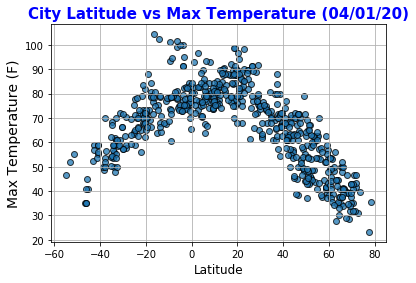

In [33]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o", edgecolors="Black", alpha=0.75)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.title("City Latitude vs Max Temperature (04/01/20)", fontsize=15, fontweight= 'bold', color='b')
plt.grid()
plt.savefig("Figure1.png")
plt.show()

## Latitude vs. Humidity Plot

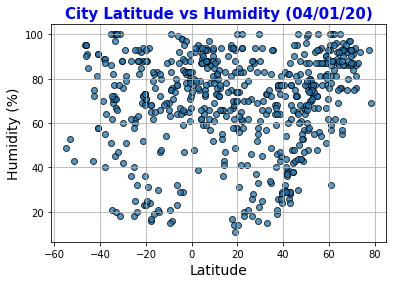

In [34]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs Humidity (04/01/20)', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("Figure2.png")

plt.show()

## Latitude vs. Cloudiness Plot

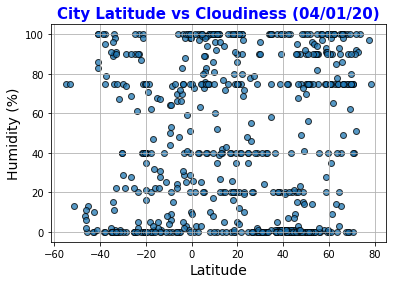

In [35]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs Cloudiness (04/01/20)', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("Figure3.png")

plt.show()

## Latitude vs. Wind Speed Plot

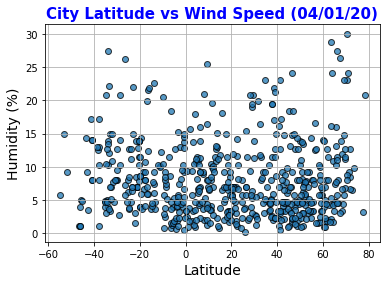

In [40]:
plt.scatter(weather_df["Latitude"], weather_df["Windspeed"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs Wind Speed (04/01/20)', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("Figure4.png")

plt.show()

## Linear Regression

In [41]:
Nothern_hem=weather_df.loc[weather_df["Latitude"]>=0]
southern_hem=weather_df.loc[weather_df["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.733827513480335


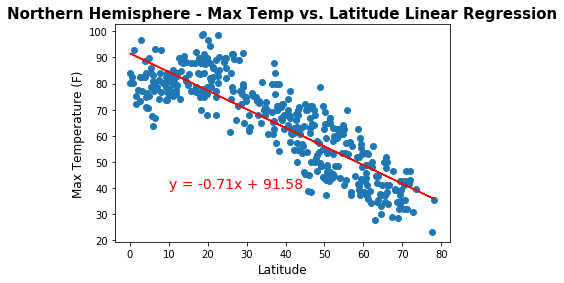

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = Nothern_hem["Latitude"]
y_values = Nothern_hem["Temperature"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5976180233423288


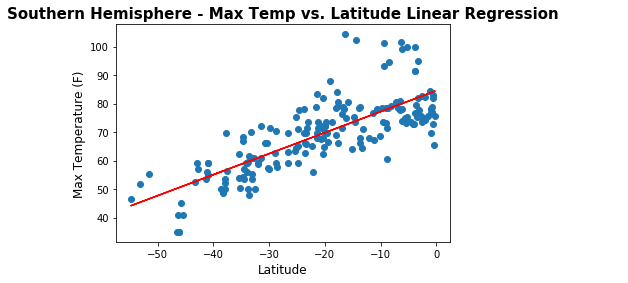

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Temperature"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0170782334644095


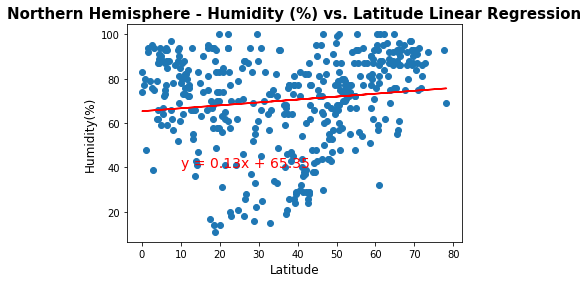

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = Nothern_hem["Latitude"]
y_values = Nothern_hem["Humidity"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity(%)', fontsize=12)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 5.772317406501672e-06


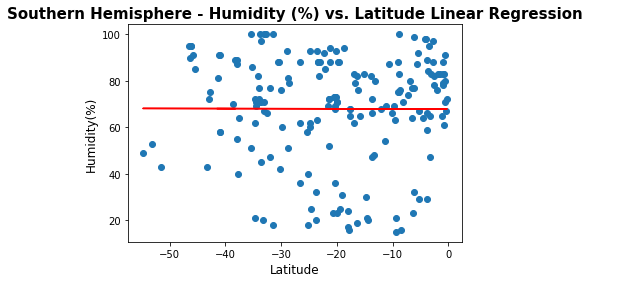

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity(%)', fontsize=12)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007883094018068631


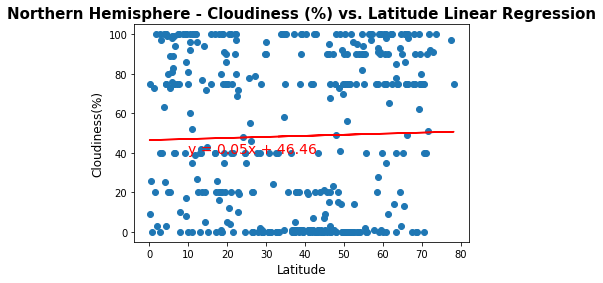

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = Nothern_hem["Latitude"]
y_values = Nothern_hem["Cloudiness"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness(%)', fontsize=12)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016578794618952065


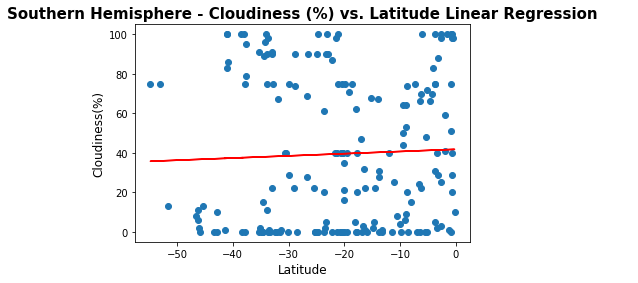

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Cloudiness"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness(%)', fontsize=12)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007965122544994976


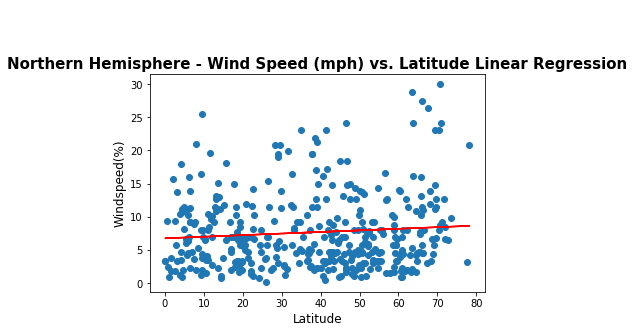

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = Nothern_hem["Latitude"]
y_values = Nothern_hem["Windspeed"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Windspeed(%)', fontsize=12)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025835448306487697


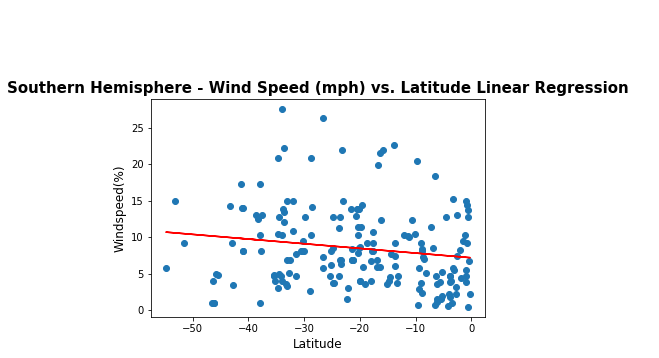

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Windspeed"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Windspeed(%)', fontsize=12)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", fontsize=15, fontweight= 'bold', color='Black')

print(f'The r-squared is: {rvalue**2}')
plt.show()
plt.savefig("Figure12.png")